# Project Business Statistics: E-news Express

## Define Problem Statement and Objectives

E-news Express, an online news portal, wants to gain more subscribers to their platform (and overall, increase engagement of all visitors) by analyzing data from existing users, and applying it to their business practice. The executives at E-news Express believe the outdated UI of their website could be responsible for low engagement and a decline in subscriber gains, and thus, opted for A/B testing to see if there is a difference in user engagement.

The developers at E-news Express created a new landing page, and have randomly sampled data from users who saw this new page, as well as those using their old (current) page in order to analyze if there is a difference in user engagement.

The objective is to determine if there is (or isn't) significant statistical evidence that this new landing page does increase user engagement and lead to a higher amount of subscribers for E-news Express (i.e., is it a good business move to implement the new landing page).

## Import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Reading the Data into a DataFrame

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module 2/Project 2/abtest.csv")

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

###General Information

In [ ]:
#Check first five rows of data set.
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
#Check last five rows of data set.
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
#See how many rows and columns there are.
print("The dataset has", df.shape[0], "rows and", df.shape[1], "columns.")

The dataset has 100 rows and 6 columns.


In [ ]:
#See data type of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
#See statistical summary of both numerical and categorical columns.
df.describe(include = "all").T

#The only numerical variable is "time_spent_on_the_page"

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Check for missing values.
df.isnull().sum()

#There are no missing values.

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [ ]:
#Check for duplicates.
df.duplicated().sum()

#There are no duplicate values.

0

### Univariate Analysis

In [ ]:
# "user_id"

#Count the number of unique users (just in case).
print("There are", df["user_id"].nunique(), "unique users in this data set.")

There are 100 unique users in this data set.


In [ ]:
# "group"

#Count how many users are in the A/B groups each.
df["group"].value_counts()


#There are 50 users in the conrol group and 50 users in the treatment group.

control      50
treatment    50
Name: group, dtype: int64

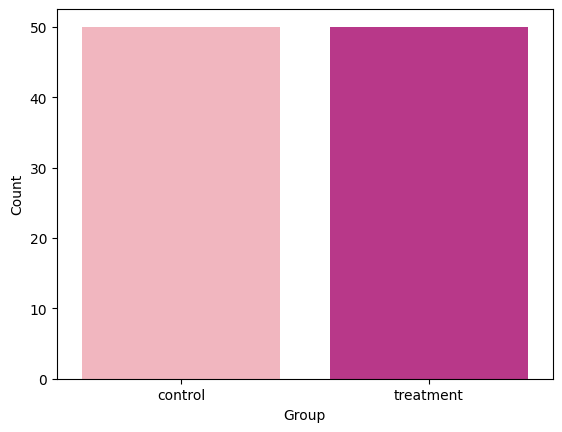

In [ ]:
#We can display this using a count plot.
sns.countplot(data = df, x = "group", palette = "RdPu")
plt.xlabel("Group")
plt.ylabel("Count")
plt.show()

In [ ]:
# "landing_page"

#Count how many users are seeing the new or old page.
df["landing_page"].value_counts()


#There are 50 users seeing the old landing page and 50 users seeing the new landing page.

old    50
new    50
Name: landing_page, dtype: int64

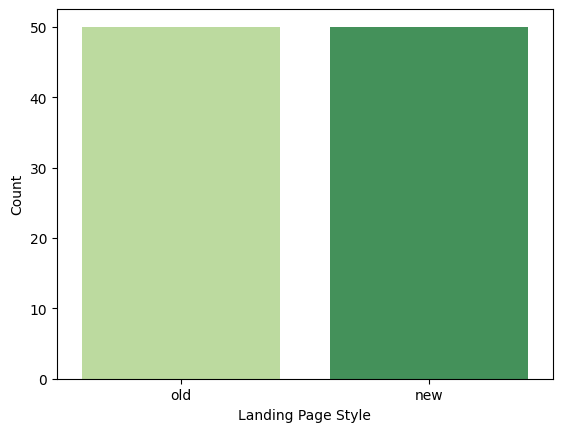

In [ ]:
#We can display this using a count plot.
sns.countplot(data = df, x = "landing_page", palette = "YlGn")
plt.xlabel("Landing Page Style")
plt.ylabel("Count")
plt.show()

In [ ]:
# "time_spent_on_the_page"

#We can calculate the mu minutes that users spend on their news page.
print("Users spend about", round(df["time_spent_on_the_page"].mean(), 2), "minutes on the page, on average.")

Users spend about 5.38 minutes on the page, on average.


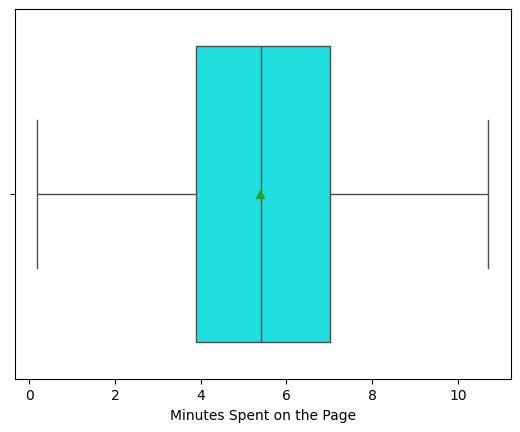

In [ ]:
#We can see the min, max, and Q1 - Q3 with a box plot. The mean can also be displayed.
sns.boxplot(data = df, x= "time_spent_on_the_page", showmeans = True, color = "cyan")
plt.xlabel("Minutes Spent on the Page")
plt.show()


#The mean and median time spent on the page are very close.

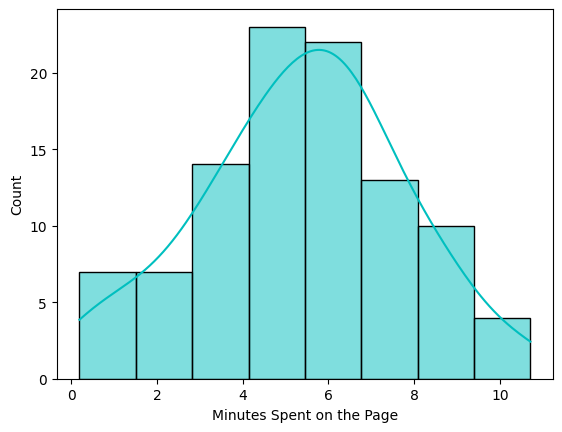

In [ ]:
#We can also use a histogram to visualize the distribution a bit better.
sns.histplot(data = df, x= "time_spent_on_the_page", kde = True, color = "c")
plt.xlabel("Minutes Spent on the Page")
plt.show()

In [ ]:
# "converted"

#Count how many users were successfully converted to subscriber or not.
df["converted"].value_counts()


#54 users were converted to subscribers and 46 were not.

yes    54
no     46
Name: converted, dtype: int64

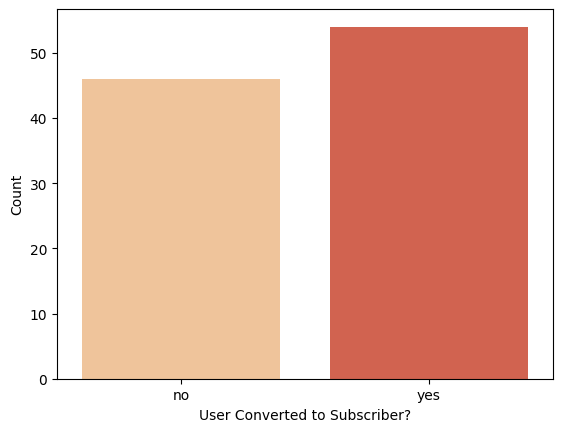

In [ ]:
#We can display this using a count plot.
sns.countplot(data = df, x = "converted", palette = "OrRd")
plt.xlabel("User Converted to Subscriber?")
plt.ylabel("Count")
plt.show()

In [ ]:
# "language_preferred"

#See how many languages users are allowed to choose from, and how many picked each.
df["language_preferred"].value_counts()



#34 users chose Spanish, 32 users chose English, and 34 users chose French.

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

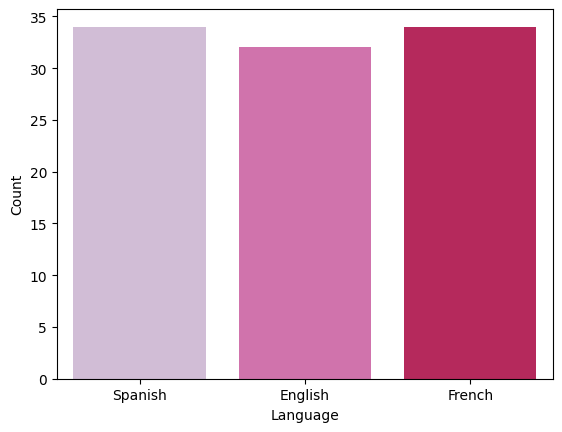

In [ ]:
#We can display this using a count plot.
sns.countplot(data = df, x = "language_preferred", palette = "PuRd")
plt.xlabel("Language")
plt.ylabel("Count")
plt.show()

### Bivariate Analysis

I will only compare the one numerical column ("time_spent_on_the_page") to the categorical variables. However, "user_id" will be excluded, since it is a descriptive variable that does not provide much insight for this particular bivariate analysis. The column "group" will also be excluded, since it is synonymous with "landing_page" (i.e., those in the control group see the old landing page, while those in the treatment group see the new landing page).

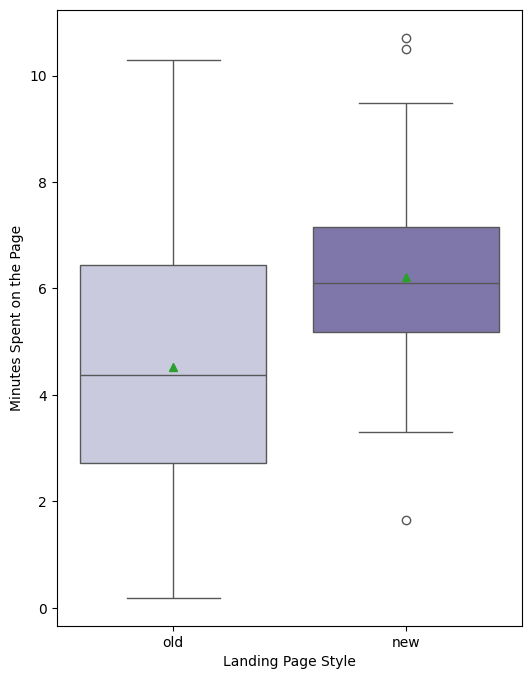

In [ ]:
# "landing_page" and "time_spent_on_the_page"

#We can find some statistical information using a boxplot.
plt.figure(figsize=(6,8))
sns.boxplot(data = df, x = "landing_page", y = "time_spent_on_the_page", showmeans = True, palette = "Purples")
plt.xlabel("Landing Page Style")
plt.ylabel("Minutes Spent on the Page")
plt.show()

The median time spent on the old landing page is lower than that of the new landing page. The means are very similar to their respective medians. There appear to be 3 outliers in the data for the new landing page (one user spent less than normal amount of time on the page, and 2 spent more than normal amount of time on it).

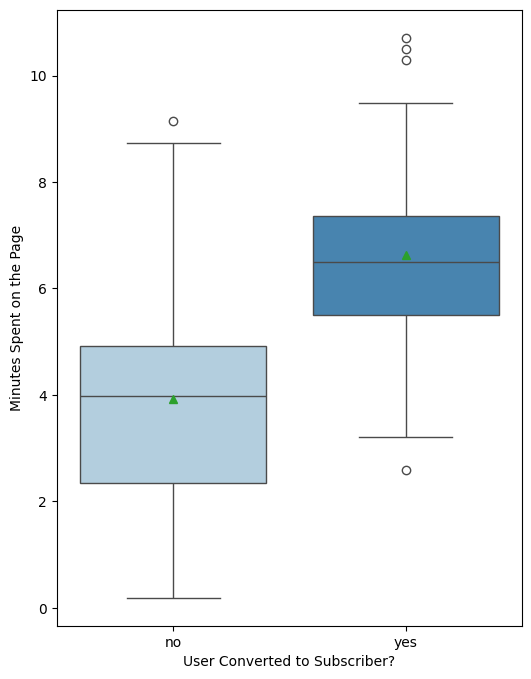

In [ ]:
# "converted" and "time_spent_on_the_page"

#We can find some statistical information using a boxplot.
plt.figure(figsize=(6,8))
sns.boxplot(data = df, x = "converted", y = "time_spent_on_the_page", showmeans = True, palette = "Blues")
plt.xlabel("User Converted to Subscriber?")
plt.ylabel("Minutes Spent on the Page")
plt.show()

Users who were not converted to subscribers spent less time on the page, compared to those who were converted. Both cases have users who spent more than normal amount of time on the page, but only one spent less than normal amount of time on it and was still converted.

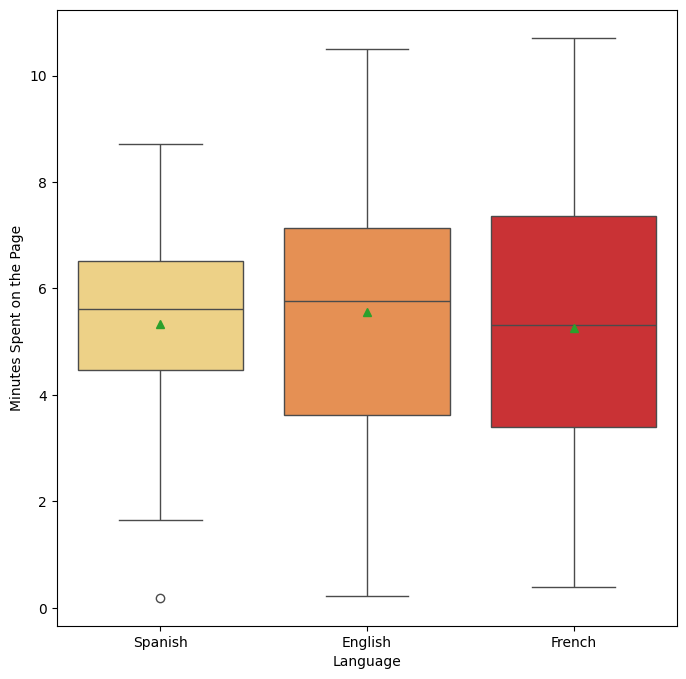

In [ ]:
# "language_preferred" and "time_spent_on_the_page"

#We can find some statistical information using a boxplot.
plt.figure(figsize=(8,8))
sns.boxplot(data = df, x = "language_preferred", y = "time_spent_on_the_page", showmeans = True, palette = "YlOrRd")
plt.xlabel("Language")
plt.ylabel("Minutes Spent on the Page")
plt.show()

Users of any of the three languages spend around 5 minutes on the page. One user who chose Spanish spent less than normal amount of time on the landing page.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

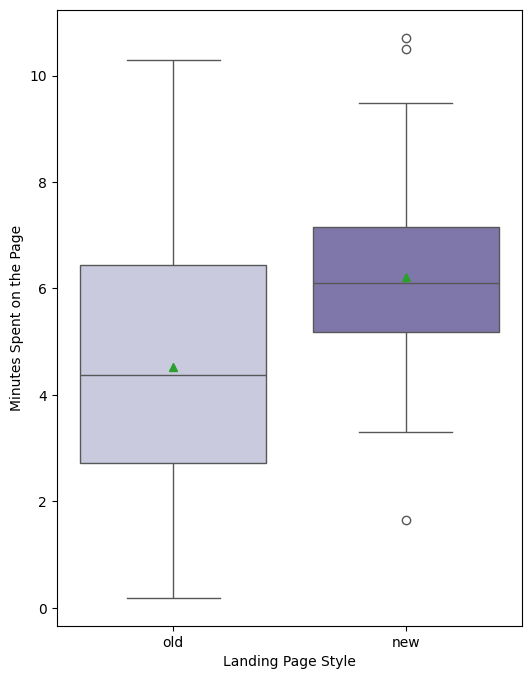

In [ ]:
#We can visualize the data distribution of "time_spent_on_the_page" for each page with boxplots.
plt.figure(figsize=(6,8))
sns.boxplot(data = df, x = "landing_page", y = "time_spent_on_the_page", showmeans = True, palette = "Purples")
plt.xlabel("Landing Page Style")
plt.ylabel("Minutes Spent on the Page")
plt.show()

### Step 1: Define the null and alternate hypotheses

H(0): μ(o) = μ(n)

Null: Users spend the same amount of time on the old landing page as the new landing page.

-----

H(a): μ(o) < μ(n)

Alternate: Users spend more time on the new landing page compared to the old landing page.

-----

Legend:

o = old landing page

n = new landing page


### Step 2: Select Appropriate test

This is a one-tailed test.

There are two independent population sample means.

We do not know the population standard deviations.

***This is a 2-independent-sample t-test.***

### Step 3: Decide the significance level

α = 0.05

***NOTE: The level of significance will be 0.05 for all tests, as the problem statement said to run analysis at this level.

### Step 4: Collect and prepare data

In [ ]:
#First, we can filter the data so that the test can calculate the sample mean for the time spent on the old and new landing pages.

#Variable for all the data of time spent on the old landing page.
timeOld = df[df["landing_page"] == "old"]["time_spent_on_the_page"]

#Variable for all the data of time spent on the new landing page.
timeNew = df[df["landing_page"] == "new"]["time_spent_on_the_page"]

#Since the test requires knowing if the sample standard deviations are equal or inequal, we can calculate those for each sample using the .std() method.
print("The sample σ of time spent on the old landing page is:", round(timeOld.std(), 2))
print("The sample σ of time spent on the new landing page is:", round(timeNew.std(), 2))

The sample σ of time spent on the old landing page is: 2.58
The sample σ of time spent on the new landing page is: 1.82


### Step 5: Calculate the p-value

In [ ]:
#Importing the test.
from scipy.stats import ttest_ind

#From the above code, we see that the σs are inequal, and that the H(a) states that μ(n) is greater. We already have variables for the two sample means.
testStat, pValue = ttest_ind(timeNew, timeOld, equal_var = False, alternative = "greater")

print("The p-value is:", pValue)

The p-value is: 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
#Let's check if the p-value is less than 0.05.
pValue < 0.05

True

### Step 7:  Draw inference

Given that the p-value we calculated is less than our level of significance, we reject the null hypothesis. Thus, there is significant statistical evidence to suggest that users spend more time on the new landing page compared to the old landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

###Perform Visual Analysis

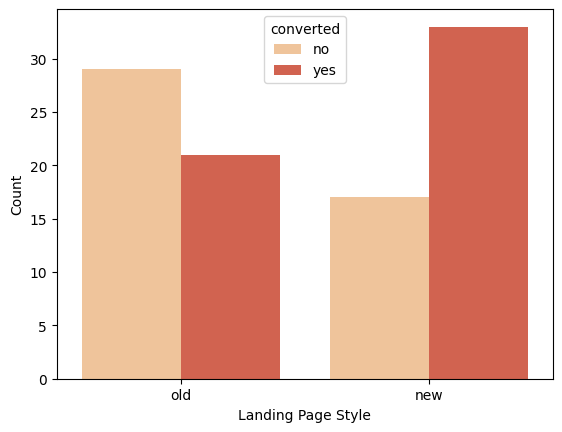

In [ ]:
#We can display the (non)converted users for the old and new landing pages using a count plot.
sns.countplot(data = df, x = "landing_page", hue = "converted", palette = "OrRd")
plt.xlabel("Landing Page Style")
plt.ylabel("Count")
plt.show()

###Step 1: Define the null and alternate hypotheses

H(0): p(o) = p(n)

Null: The coversion rate is the same for the old landing page as for the new landing page.

-----

H(a): p(o) < p(n)

Alternate: The conversion rate is higher for the new landing page compared to the old landing page.

-----

Legend:

o = old landing page

n = new landing page

###Step 2: Select Appropriate test

This is a one-tailed test.

There are two proportions of independent populations.

***This is a 2-proportions z-test.***


###Step 3: Decide the significance level

α = 0.05

###Step 4: Collect and prepare data

In [ ]:
'''It appears from the data set that "group" and "landing_page" are synonymous;
users in the 'treatment' group have the new landing page, while users in the 'control' group have the old landing page.
Thus, I will consider the total number of users for each the old and new landing pages as my "nobs" attributes.'''

#We can collect the number of converted users from both the old and new landing pages for the "counts" attribute of the test.

#Variable for the number of users converted on the old landing page.
oldConverted = df[df["landing_page"] == "old"]["converted"].value_counts()["yes"]

#Variable for the number of users converted on the new landing page.
newConverted = df[df["landing_page"] == "new"]["converted"].value_counts()["yes"]


#We can collect the total number of users in each group for the "nobs" attribute of the test.

#Variable for the total number of users of the old landing page.
oldUsers = df["landing_page"].value_counts()["old"]

#Variable for the total number of users of the new landing page.
newUsers = df["landing_page"].value_counts()["new"]

###Step 5: Calculate the p-value

In [ ]:
#Import the test.
from statsmodels.stats.proportion import proportions_ztest

#Create the "counts" and "nobs" variables for cleaner code.
counts = np.array([newConverted, oldConverted])
nobs = np.array([newUsers, oldUsers])

#Calculate the p-value
testStat2, pValue2 = proportions_ztest(counts, nobs, alternative = "larger")

print("The p-value is:", pValue2)

The p-value is: 0.008026308204056278


###Step 6: Compare the p-value with  α

In [ ]:
#Check is the p-value is less than 0.05.
pValue2 < 0.05

True

###Step 7: Draw inference

Given that the p-value we calculated is less than our level of significance, we reject the null hypothesis. Thus, there is significant statistical evidence to suggest that more users get converted to subscribers on the new landing page compared to the old landing page.

## 3. Is the conversion and preferred language are independent or related?

###Perform Visual Analysis

In [ ]:
#We can create a contingency table to display the two categorical variables.
pd.crosstab(df["converted"], df["language_preferred"])

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


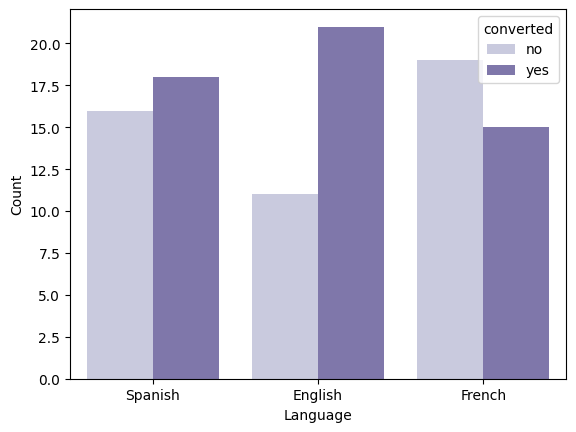

In [ ]:
#We can display the coverted users for each language using a count plot.
sns.countplot(data = df, x = "language_preferred", hue = "converted", palette = "Purples")
plt.xlabel("Language")
plt.ylabel("Count")
plt.show()

###Step 1: Define the null and alternate hypotheses

Null: Conversion status does not depend on preferred language (they are *independent*).

-----

Alternate: Conversion status is *dependent* on preferred language.




###Step 2: Select Appropriate test

There are two categotical variables.

For each category of each variable, n >= 5.

***This is a chi-square test of independence.***

###Step 3: Decide the significance level

α = 0.05

###Step 4: Collect and prepare data

In [ ]:
#We can create a variable that holds the contingency table from the visual analysis part to run our test.
contingencyTable = pd.crosstab(df["converted"], df["language_preferred"])

###Step 5: Calculate the p-value

In [ ]:
#Import the test.
from scipy.stats import chi2_contingency

#Calculate the p-value.
chi, pValue3, dof, expected = chi2_contingency(contingencyTable)

print("The p-value is:", pValue3)

The p-value is: 0.21298887487543447


###Step 6: Compare the p-value with  α

In [ ]:
#Check is the p-value is less than 0.05.
pValue3 < 0.05

False

###Step 7: Draw inference

Given that the p-value we calculated is greater than our level of significance, we fail to reject the null hypothesis. Thus, we can safely assume that conversion status and preferred language are independent factors (i.e., conversion status does NOT depend on preferred language).

## 4. Is the time spent on the new page same for the different language users?

###Perform Visual Analysis

In [ ]:
#We can create a new dataframe that only holds data about language and time spent on the NEW page.
dfNew = df[df["landing_page"] == "new"].copy()

#Checking to make sure the collected data is appropriate for the test.
dfNew.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
93,546474,treatment,new,4.94,no,French
95,546446,treatment,new,5.15,no,Spanish
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


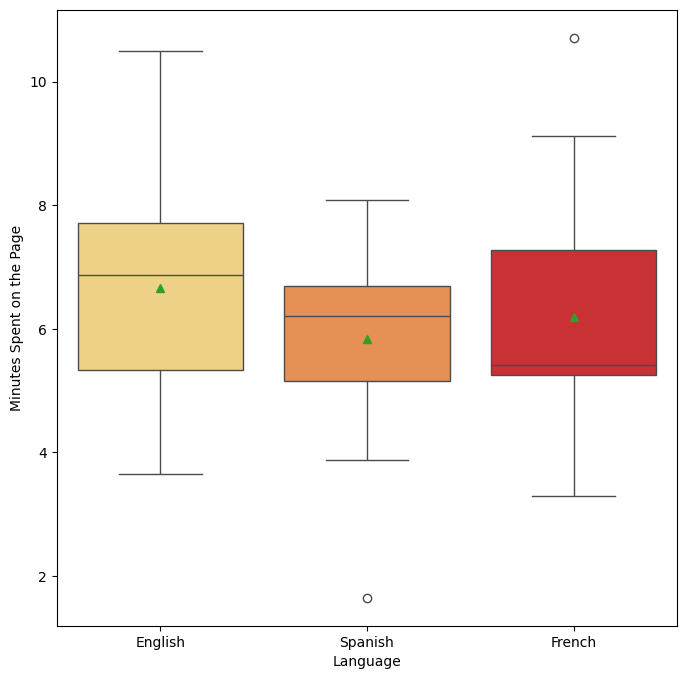

In [ ]:
#We can visualize the data distribution of time spent on the new page for each language with boxplots.
plt.figure(figsize=(8,8))
sns.boxplot(data = dfNew, x = "language_preferred", y = "time_spent_on_the_page", showmeans = True, palette = "YlOrRd")
plt.xlabel("Language")
plt.ylabel("Minutes Spent on the Page")
plt.show()

In [ ]:
#The means (and their respective medians) appear to be significantly different from each other. Let's calculate the mean for each language.

dfNew.groupby(["language_preferred"])["time_spent_on_the_page"].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

Average time spent on the new landing page for ___ users:
* Spanish: ~5.84 minutes
* English: ~6.66 minutes
* French: ~6.20 minutes

###Step 1: Define the null and alternate hypotheses

H(0): μ(S) = μ(E)= μ(F)

Null: Users who choose Spanish as their preferred language spend the same amount of time on the new page as users who choose English or French.

-----
H(a): At least one of the means differs from the others.

-----

Legend:

S = Spanish

E = English

F = French

###Step 2: Select Appropriate test

There are three sample means from independent populations.

***This is a one-way ANOVA F-test***

###Step 2a: Validate assumptions

We use Shapiro-Wilk's Test to validate the normality assumption. Our null hypothesis is that the data we are analyzing follows a normal distribution. A p-value > 0.05 means we fail to reject this null hypothesis (meaning the data IS normally distributed), and can continue onto the ANOVA test.

In [ ]:
#Import the test.
from scipy import stats

#Test the data for a normal distribution.
w, pValueSW = stats.shapiro(dfNew["time_spent_on_the_page"])

print("The p-value is:", pValueSW)

The p-value is: 0.8040016293525696


In [ ]:
pValueSW > 0.05

True

We use Levene's Test to validate the common variances assumption. Our null hypothesis is that all the populations we are testing have common/equal variances. A p-value > 0.05 means we fail to reject this null hypothesis (meaning all the population variances are common), and can continue onto the ANOVA test.

In [ ]:
#Import the test.
from scipy.stats import levene

#Test the data for equal variances.
statistic, pValueL = levene(dfNew[dfNew["language_preferred"] == "Spanish"]["time_spent_on_the_page"], dfNew[dfNew["language_preferred"] == "English"]["time_spent_on_the_page"], dfNew[dfNew["language_preferred"] == "French"]["time_spent_on_the_page"])

print("The p-value is:", pValueL)

The p-value is: 0.46711357711340173


In [ ]:
pValueSW > 0.05

True

###Step 3: Decide the significance level

α = 0.05

###Step 4: Collect and prepare data

In [ ]:
#We need to filter out the data for time spent on the new landing page for each language.

#Variable for time spent on new landing page for Spanish-speaking users.
timeSpanish = dfNew[dfNew["language_preferred"] == "Spanish"]["time_spent_on_the_page"]

#Variable for time spent on new landing page for English-speaking users.
timeEnglish = dfNew[dfNew["language_preferred"] == "English"]["time_spent_on_the_page"]

#Variable for time spent on new landing page for French-speaking users.
timeFrench = dfNew[dfNew["language_preferred"] == "French"]["time_spent_on_the_page"]

###Step 5: Calculate the p-value

In [ ]:
#Import the test.
from scipy.stats import f_oneway

#Calculate the p-value.
fStat, pValue4 = f_oneway(timeSpanish, timeEnglish, timeFrench)

print("The p-value is:", pValue4)

The p-value is: 0.43204138694325955


###Step 6: Compare the p-value with α

In [ ]:
#Check is the p-value is less than 0.05.
pValue4 < 0.05

False

###Step 7: Draw inference

Given that the p-value we calculated is much greater than our level of significance, we fail to reject the null hypothesis. Thus, we can assume that users who choose Spanish as their preferred language spend about the same amount of time on the new landing page as those who choose English or French (all averages are about the same).

## Conclusion and Business Recommendations

Conclusions:

* Users spend more time on the new landing page compared to the old landing page.

* More users get converted to subscribers if they get the new landing page compared to the old landing page.

* Chosen language does not affect conversion rate.

* Speakers of one language don't appear to spend more time on the page than those of the other languages.


The above conclusions reached from analyzing the provided data indicate that E-news Express should definitely move forward with fully implementing the new landing page. The new landing page keeps users on the site for longer periods of time, and is more likely to get them to subscribe. The UI is likely more user-friendly and shows more relevant content, and thus, is more engaging. E-news Express should also not worry about catering their new page to users who speak a specific language (of the three observed). Overall, getting rid of the old landing page and implementing the new design will likely improve their business.

___